In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### IMPORT LIBRARIES

In [11]:
import yfinance as yf # fetch historical market data from Yahoo Finance.
import numpy as np # for scientific computing in Python, it provides support for arrays, matrices.
import pandas as pd # for data manipulation and analysis
import matplotlib.pyplot as plt # plotting library for creating static, animated and visualizations in Python
import seaborn as sns # for drawing attractive and informative statistical graphics
from sklearn.preprocessing import StandardScaler #
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,roc_curve, classification_report
from sklearn.metrics import confusion_matrix, make_scorer, roc_auc_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

### EXTRACT DAILY STOCK PRICE FROM YFINANCE

In [9]:
import yfinance as yf

nkedata = yf.download('NKE', start="2014-01-01", end='2023-12-31')

nkedata

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,39.075001,39.415001,38.965000,39.119999,34.917236,5318600
2014-01-03,39.075001,39.314999,38.980000,39.014999,34.823536,5597000
2014-01-06,39.235001,39.299999,38.705002,38.715000,34.555759,6045800
2014-01-07,38.855000,39.000000,38.705002,38.744999,34.582531,6769000
2014-01-08,38.750000,38.974998,38.465000,38.544998,34.404018,6897800
...,...,...,...,...,...,...
2023-12-22,108.260002,110.800003,107.449997,108.040001,107.655373,46642900
2023-12-26,108.300003,108.690002,107.480003,108.019997,107.635437,12846700
2023-12-27,108.339996,108.589996,106.849998,107.129997,106.748604,10157900


### DATA REDUCTION

In [10]:
nkedata = nkedata.dropna() 
nkedata = nkedata[['Volume','Open', 'High', 'Low', 'Close']]
nkedata

,Volume,Open,High,Low,Close
Date,,,,,
2014-01-02,5318600,39.075001,39.415001,38.965000,39.119999
2014-01-03,5597000,39.075001,39.314999,38.980000,39.014999
2014-01-06,6045800,39.235001,39.299999,38.705002,38.715000
2014-01-07,6769000,38.855000,39.000000,38.705002,38.744999
2014-01-08,6897800,38.750000,38.974998,38.465000,38.544998
...,...,...,...,...,...
2023-12-22,46642900,108.260002,110.800003,107.449997,108.040001
2023-12-26,12846700,108.300003,108.690002,107.480003,108.019997
2023-12-27,10157900,108.339996,108.589996,106.849998,107.129997


## DATA MANIPULATION

### MOVING AVERAGES AND MOVING STANDARD DEVIATION

In [121]:
nkedata = nkedata.dropna() 
nkedata = nkedata[['Open', 'High', 'Low', 'Close']]

nkedata['H-L'] = nkedata['High'] - nkedata['Low'] 
nkedata['O-C'] = nkedata['Close'] - nkedata['Open'] 

# Calculate moving averages
nkedata['50day MA'] = nkedata['Close'].rolling(window=50).mean()
nkedata['200day MA'] = nkedata['Close'].rolling(window=200).mean()

nkedata['Std_dev']= nkedata['Close'].rolling(5).std() 

nkedata['Price_Rise'] = np.where(nkedata['Close'].shift(-1) > nkedata['Close'], 1, 0)
nkedata = nkedata.dropna()
nkedata.head(10)

,Open,High,Low,Close,H-L,O-C,50day MA,200day MA,Std_dev,Price_Rise
Date,,,,,,,,,,
2015-08-03,57.755001,58.000000,56.794998,57.415001,1.205002,-0.340000,53.9866,49.775050,0.348586,1
2015-08-04,57.474998,57.965000,57.165001,57.884998,0.799999,0.410000,54.1000,49.846875,0.187782,1
2015-08-05,58.305000,58.860001,58.174999,58.375000,0.685001,0.070000,54.2333,49.920800,0.387420,0
2015-08-06,58.500000,58.750000,57.185001,57.560001,1.564999,-0.939999,54.3561,49.986350,0.379133,0
2015-08-07,57.360001,57.480000,56.549999,57.255001,0.930000,-0.105000,54.4782,50.046025,0.444038,1
2015-08-10,57.695000,58.084999,57.424999,57.680000,0.660000,-0.014999,54.6151,50.109775,0.416794,0
2015-08-11,57.070000,57.494999,56.814999,57.230000,0.680000,0.160000,54.7421,50.170000,0.464368,0
2015-08-12,56.770000,56.875000,55.325001,56.529999,1.549999,-0.240002,54.8516,50.225400,0.447164,1
2015-08-13,56.634998,57.264999,56.474998,56.799999,0.790001,0.165001,54.9625,50.280300,0.445034,1


#### PLOT MOVING AVERAGES (Fig.1)

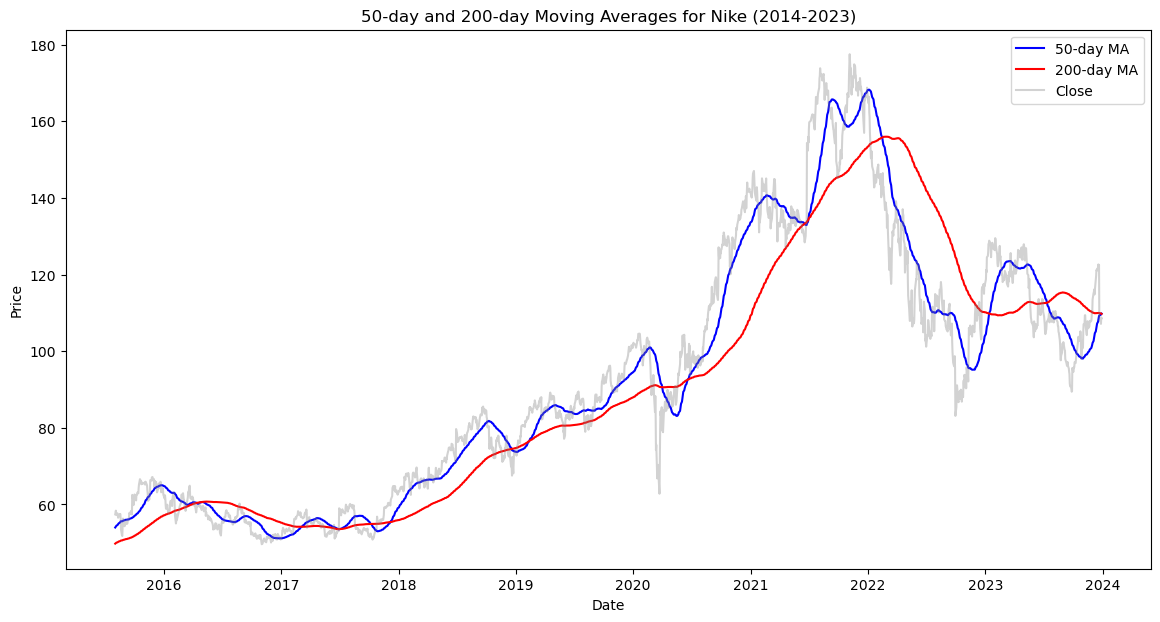

In [122]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(nkedata.index, nkedata['50day MA'], label='50-day MA', color='blue')  # Plotting the 50-day MA
plt.plot(nkedata.index, nkedata['200day MA'], label='200-day MA', color='red')  # Plotting the 200-day MA

# Plot the closing price to see how the MAs compare to the actual price
plt.plot(nkedata.index, nkedata['Close'], label='Close', alpha=0.35, color='grey')

plt.title('50-day and 200-day Moving Averages for Nike (2014-2023)')  # Title of the plot
plt.xlabel('Date')  # X-axis label
plt.ylabel('Price')  # Y-axis label
plt.legend()  # Show legend to identify the lines
plt.show()  # Display the plot

#### PLOT FOR 0-C, H-L AND STD (Fig.2)

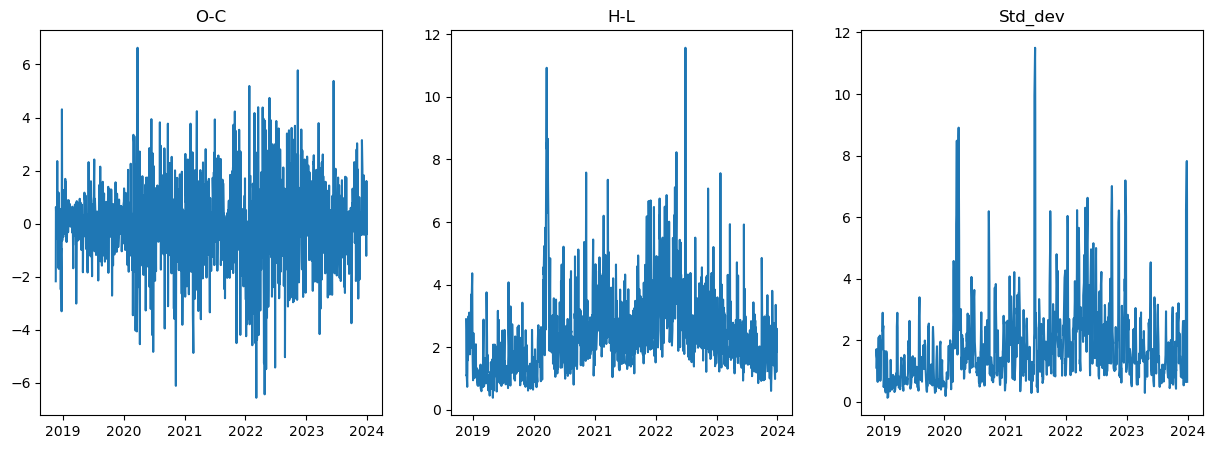

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(nkedata['O-C'])
axes[0].set_title('O-C')
axes[1].plot(nkedata['H-L'])
axes[1].set_title('H-L')
axes[2].plot(nkedata['Std_dev'])
axes[2].set_title('Std_dev')

plt.show()

#### HISTORGRAM FOR 50DAY MA AND 200DAY MA DENSITY (Fig.3)

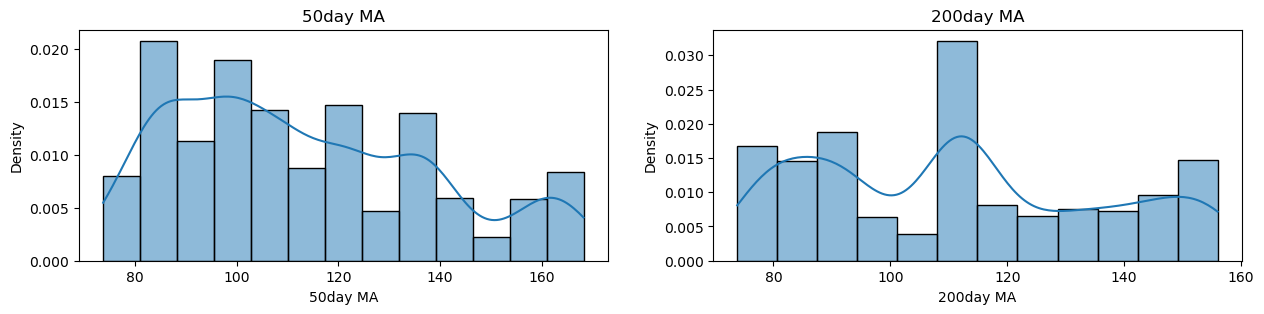

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(15,3))  # 1 row, 3 columns

sns.histplot(data=nkedata, x="50day MA", kde=True, stat="density", ax=axes[0])
axes[0].set_title('50day MA')

sns.histplot(data=nkedata, x="200day MA", kde=True, stat="density", ax=axes[1])
axes[1].set_title('200day MA')

plt.show()

#### HISTORGRAM AND SCATTER PLOT FOR PRICE RISE  (Fig.4)

/Users/berke/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/berke/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


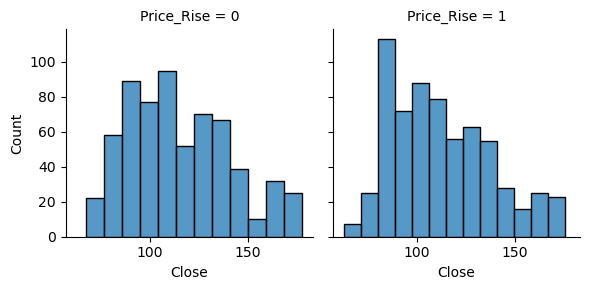

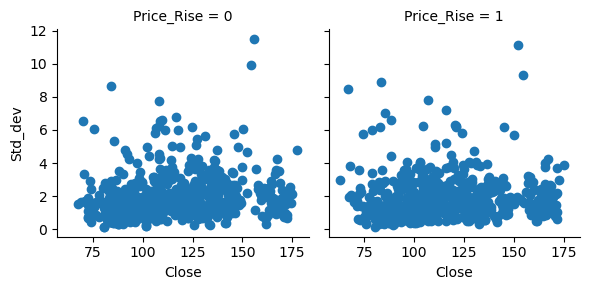

In [116]:
chart = sns.FacetGrid(nkedata, col='Price_Rise')  
chart.map(sns.histplot, 'Close') 

chart = sns.FacetGrid(nkedata, col='Price_Rise')  
chart.map(plt.scatter, 'Close','Std_dev')  

#### SUMMARY STATISTICS (Fig.5)

In [36]:
# Generating summary statistics
summary_statistics = nkedata.describe()

# Display the summary statistics
print(summary_statistics)

              Open         High          Low        Close          H-L  \
count  1286.000000  1286.000000  1286.000000  1286.000000  1286.000000   
mean    113.678072   114.893305   112.441151   113.668624     2.452154   
std      25.708776    25.845896    25.495888    25.647864     1.323130   
min      64.790001    66.879997    60.000000    62.799999     0.380005   
25%      92.547499    93.577497    91.654999    92.337500     1.529999   
50%     108.689999   109.895000   107.480003   108.695000     2.160000   
75%     132.165001   133.310005   130.250004   131.892502     2.989996   
max     176.350006   179.100006   175.500000   177.509995    11.570000   

               O-C     50day MA    200day MA      Std_dev   Price_Rise  
count  1286.000000  1286.000000  1286.000000  1286.000000  1286.000000  
mean     -0.009448   112.958763   111.299294     1.838108     0.505443  
std       1.615905    25.354979    24.530668     1.326499     0.500165  
min      -6.559998    73.701200    73.802

In [44]:
nkedata.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1286 entries, 2018-11-19 to 2023-12-29
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1286 non-null   float64
 1   High        1286 non-null   float64
 2   Low         1286 non-null   float64
 3   Close       1286 non-null   float64
 4   H-L         1286 non-null   float64
 5   O-C         1286 non-null   float64
 6   50day MA    1286 non-null   float64
 7   200day MA   1286 non-null   float64
 8   Std_dev     1286 non-null   float64
 9   Price_Rise  1286 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 110.5 KB


#### CORRELATION MATRIX (Fig.6)

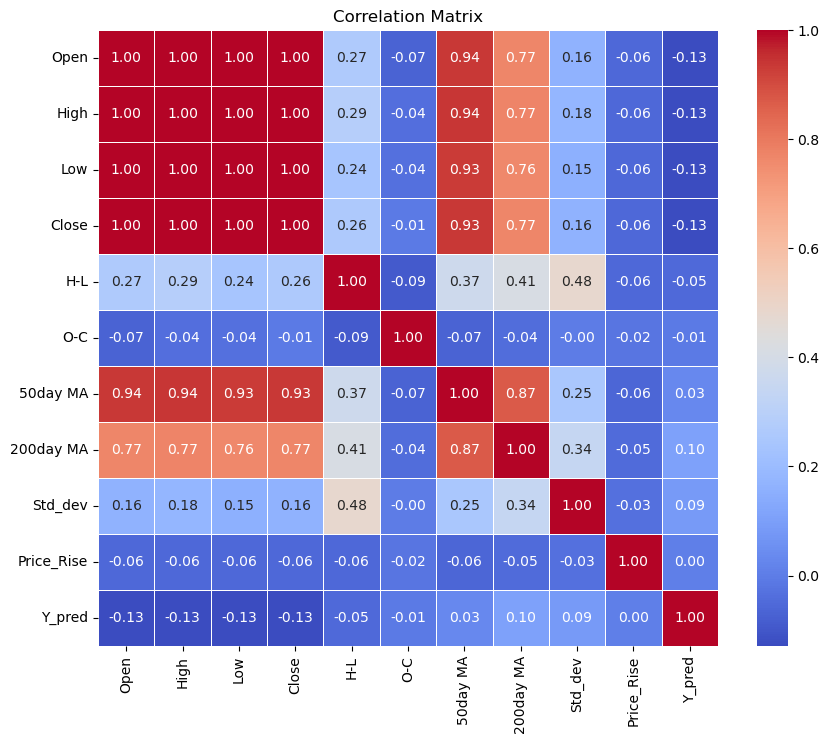

In [118]:
corr_matrix = nkedata.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## MACHINE LEARNING CLASSIFICATION METHODS

### LOGISTIC REGRESSION

In [76]:
#Set target variable y(Price_Rise 0 or 1 )and features x 
#(from H-L column to Std_dev column)

X = nkedata.iloc[:, 4:-1] 
Y = nkedata.iloc[:, -1]

In [77]:
X

,H-L,O-C,50day MA,200day MA,Std_dev
Date,,,,,
2018-11-19,2.889999,-2.170006,78.7362,73.80265,1.110730
2018-11-20,2.550003,0.630005,78.5446,73.84330,1.710823
2018-11-21,1.090004,0.380005,78.3144,73.87280,1.496405
2018-11-23,1.109993,-0.560005,78.1018,73.90650,1.409421
2018-11-26,0.730003,0.370003,77.8622,73.95150,0.695894
...,...,...,...,...,...
2023-12-22,3.350006,-0.220001,109.1530,109.98865,6.248898
2023-12-26,1.209999,-0.280006,109.3288,109.93950,7.775640
2023-12-27,1.739998,-1.209999,109.4910,109.89215,7.823366


In [78]:
# Split the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                   shuffle=False)
X_test

,H-L,O-C,50day MA,200day MA,Std_dev
Date,,,,,
2022-12-20,1.720001,0.209999,99.6484,110.49105,3.589912
2022-12-21,3.840004,-0.980003,99.9788,110.38490,5.243748
2022-12-22,2.760002,2.419998,100.5346,110.35775,6.775389
2022-12-23,1.389999,0.139999,101.0986,110.30655,7.192036
2022-12-27,2.379997,1.089996,101.6324,110.25765,6.013000
...,...,...,...,...,...
2023-12-22,3.350006,-0.220001,109.1530,109.98865,6.248898
2023-12-26,1.209999,-0.280006,109.3288,109.93950,7.775640
2023-12-27,1.739998,-1.209999,109.4910,109.89215,7.823366


In [80]:
# Standardise the feature

scaler = StandardScaler()$
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
# Calculate Mean Absolute Error

from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)
from sklearn.metrics import mean_absolute_error
print ("MAE", mean_absolute_error(Y_test, Y_pred))

MAE 0.49896498943453904


In [85]:
# Model
modellr = LogisticRegression(random_state=101)
# Train the model
modellr.fit(X_train, Y_train)
# Predict on the test set
Y_pred = modellr.predict(X_test)

print (classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.54      0.23      0.33       133
           1       0.49      0.79      0.61       125

    accuracy                           0.50       258
   macro avg       0.52      0.51      0.47       258
weighted avg       0.52      0.50      0.46       258



### EXTRA TREES

In [87]:
#Model
modelet = ExtraTreesClassifier(random_state=101)
# Train the model
modelet.fit(X_train, Y_train)
# Predict on the test set
Y_pred = modelet.predict(X_test)

print (classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.52      0.44      0.48       133
           1       0.49      0.56      0.52       125

    accuracy                           0.50       258
   macro avg       0.50      0.50      0.50       258
weighted avg       0.50      0.50      0.50       258



### PREDICTION OF PRICE RISE USING EXTRA TREES

In [93]:
modelet = ExtraTreesClassifier(random_state=101)
modelet.fit(X_train, Y_train)
Y_pred = modelet.predict(X_test)

classification_rep = classification_report(Y_test, Y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.44      0.48       133
           1       0.49      0.56      0.52       125

    accuracy                           0.50       258
   macro avg       0.50      0.50      0.50       258
weighted avg       0.50      0.50      0.50       258



## CROSS VALIDATION

### CROSS VALIDATION FOR LOGISTIC REGRESSION

In [90]:
accuracy_scores = cross_val_score(modellr, X, Y, cv=5, 
                scoring=make_scorer(accuracy_score))

# Print mean and standard deviation of accuracy
print(f"Mean Accuracy: {accuracy_scores.mean():.2f}")
print(f"Standard Deviation: {accuracy_scores.std():.2f}")

Mean Accuracy: 0.49
Standard Deviation: 0.02


### CROSS VALIDATION FOR EXTRA TREE

In [91]:
accuracy_scores = cross_val_score(modelet, X, Y, cv=5, 
                scoring=make_scorer(accuracy_score))

# Mean and standard deviation of accuracy
print(f"Mean Accuracy: {accuracy_scores.mean():.2f}")
print(f"Standard Deviation Accuracy: {accuracy_scores.std():.2f}")

Mean Accuracy: 0.46
Standard Deviation Accuracy: 0.05


## CONFUSION MATRIX (Extra Tree classification model) (Fig.7)

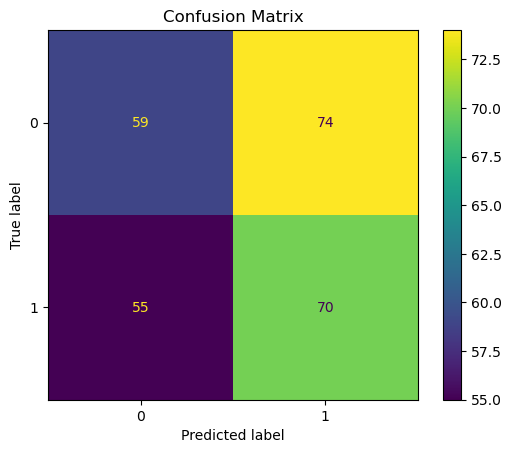

In [98]:
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Evaluate the modelet by means of a Confusion Matrix
matrix = ConfusionMatrixDisplay.from_estimator(modelet, X_test, Y_test)  
plt.title('Confusion Matrix')
plt.show(matrix)
plt.show()

In [123]:
## ROC CURVE (Extra Tree classification model) (Fig.8)

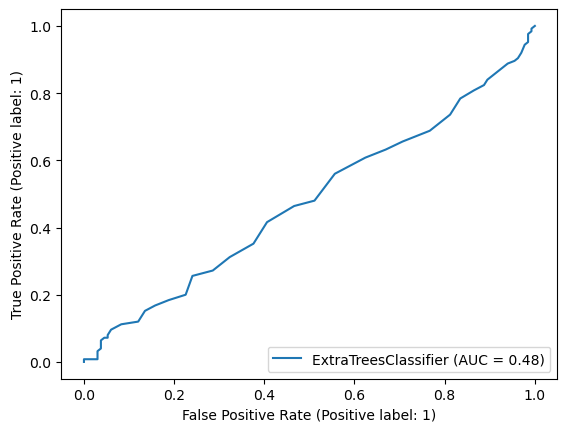

In [97]:
log_disp = RocCurveDisplay.from_estimator(modelet, X_test, Y_test)

## IMPORTANCE OF CLASSIFIERS

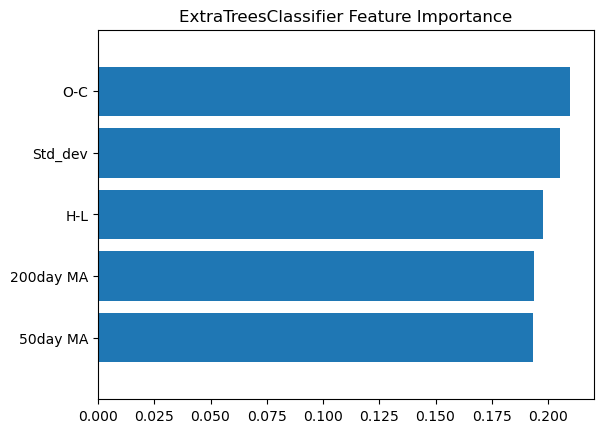

In [100]:
#Importance of classifiers 
feature_names=X.columns
importance = modelet.feature_importances_ 
indices = np.argsort(importance)
range1 = range(len(importance[indices]))
plt.figure()
plt.title("ExtraTreesClassifier Feature Importance")
plt.barh(range1,importance[indices])
plt.yticks(range1, feature_names[indices])
plt.ylim([-1, len(range1)])
plt.show()

## MARKET AND RETURN STRATEGIES

### DATA PREPROCESSING

In [102]:
#Create new column Y_pred
nkedata['Y_pred'] = np.NaN
nkedata.iloc[(len(nkedata) - len(Y_pred)):,-1] = Y_pred
trade_nkedata = nkedata.dropna()
trade_nkedata

,Open,High,Low,Close,H-L,O-C,50day MA,200day MA,Std_dev,Price_Rise,Y_pred
Date,,,,,,,,,,,
2022-12-20,103.000000,103.400002,101.680000,103.209999,1.720001,0.209999,99.6484,110.49105,3.589912,1,0.0
2022-12-21,116.760002,119.180000,115.339996,115.779999,3.840004,-0.980003,99.9788,110.38490,5.243748,1,0.0
2022-12-22,114.290001,116.820000,114.059998,116.709999,2.760002,2.419998,100.5346,110.35775,6.775389,0,1.0
2022-12-23,116.110001,117.169998,115.779999,116.250000,1.389999,0.139999,101.0986,110.30655,7.192036,1,1.0
2022-12-27,116.470001,118.199997,115.820000,117.559998,2.379997,1.089996,101.6324,110.25765,6.013000,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,108.260002,110.800003,107.449997,108.040001,3.350006,-0.220001,109.1530,109.98865,6.248898,0,1.0
2023-12-26,108.300003,108.690002,107.480003,108.019997,1.209999,-0.280006,109.3288,109.93950,7.775640,0,1.0
2023-12-27,108.339996,108.589996,106.849998,107.129997,1.739998,-1.209999,109.4910,109.89215,7.823366,1,1.0


### COMPUTATION OF MARKET RETURNS

In [106]:
trade_nkedata['Tomorrows Returns'] = 0.
trade_nkedata['Tomorrows Returns'] = np.log(trade_nkedata['Close']/trade_nkedata['Close'].shift(1))
trade_nkedata['Tomorrows Returns'] = trade_nkedata['Tomorrows Returns'].shift(-1)
trade_nkedata

/var/folders/sb/y8bj5dwj35z3pxd7_0hbxrrm0000gn/T/ipykernel_17762/2338111002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_nkedata['Tomorrows Returns'] = 0.
/var/folders/sb/y8bj5dwj35z3pxd7_0hbxrrm0000gn/T/ipykernel_17762/2338111002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_nkedata['Tomorrows Returns'] = np.log(trade_nkedata['Close']/trade_nkedata['Close'].shift(1))
/var/folders/sb/y8bj5dwj35z3pxd7_0hbxrrm0000gn/T/ipykernel_17762/2338111002.py:3: SettingWithCopyWarning: 
A value i

,Open,High,Low,Close,H-L,O-C,50day MA,200day MA,Std_dev,Price_Rise,Y_pred,Tomorrows Returns
Date,,,,,,,,,,,,
2022-12-20,103.000000,103.400002,101.680000,103.209999,1.720001,0.209999,99.6484,110.49105,3.589912,1,0.0,0.114926
2022-12-21,116.760002,119.180000,115.339996,115.779999,3.840004,-0.980003,99.9788,110.38490,5.243748,1,0.0,0.008000
2022-12-22,114.290001,116.820000,114.059998,116.709999,2.760002,2.419998,100.5346,110.35775,6.775389,0,1.0,-0.003949
2022-12-23,116.110001,117.169998,115.779999,116.250000,1.389999,0.139999,101.0986,110.30655,7.192036,1,1.0,0.011206
2022-12-27,116.470001,118.199997,115.820000,117.559998,2.379997,1.089996,101.6324,110.25765,6.013000,0,1.0,-0.022191
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,108.260002,110.800003,107.449997,108.040001,3.350006,-0.220001,109.1530,109.98865,6.248898,0,1.0,-0.000185
2023-12-26,108.300003,108.690002,107.480003,108.019997,1.209999,-0.280006,109.3288,109.93950,7.775640,0,1.0,-0.008273
2023-12-27,108.339996,108.589996,106.849998,107.129997,1.739998,-1.209999,109.4910,109.89215,7.823366,1,1.0,0.015652


### COMPUTATION OF STRATEGY RETURNS

In [109]:
#Strategy Returns based on Y_Pred
trade_nkedata['Strategy Returns'] = 0.
trade_nkedata['Strategy Returns'] = np.where(trade_nkedata['Y_pred'] == True,
                                 trade_nkedata['Tomorrows Returns'], - trade_nkedata['Tomorrows Returns'])
trade_nkedata

/var/folders/sb/y8bj5dwj35z3pxd7_0hbxrrm0000gn/T/ipykernel_17762/2200623650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_nkedata['Strategy Returns'] = 0.
/var/folders/sb/y8bj5dwj35z3pxd7_0hbxrrm0000gn/T/ipykernel_17762/2200623650.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_nkedata['Strategy Returns'] = np.where(trade_nkedata['Y_pred'] == True,


,Open,High,Low,Close,H-L,O-C,50day MA,200day MA,Std_dev,Price_Rise,Y_pred,Tomorrows Returns,Strategy Returns
Date,,,,,,,,,,,,,
2022-12-20,103.000000,103.400002,101.680000,103.209999,1.720001,0.209999,99.6484,110.49105,3.589912,1,0.0,0.114926,-0.114926
2022-12-21,116.760002,119.180000,115.339996,115.779999,3.840004,-0.980003,99.9788,110.38490,5.243748,1,0.0,0.008000,-0.008000
2022-12-22,114.290001,116.820000,114.059998,116.709999,2.760002,2.419998,100.5346,110.35775,6.775389,0,1.0,-0.003949,-0.003949
2022-12-23,116.110001,117.169998,115.779999,116.250000,1.389999,0.139999,101.0986,110.30655,7.192036,1,1.0,0.011206,0.011206
2022-12-27,116.470001,118.199997,115.820000,117.559998,2.379997,1.089996,101.6324,110.25765,6.013000,0,1.0,-0.022191,-0.022191
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,108.260002,110.800003,107.449997,108.040001,3.350006,-0.220001,109.1530,109.98865,6.248898,0,1.0,-0.000185,-0.000185
2023-12-26,108.300003,108.690002,107.480003,108.019997,1.209999,-0.280006,109.3288,109.93950,7.775640,0,1.0,-0.008273,-0.008273
2023-12-27,108.339996,108.589996,106.849998,107.129997,1.739998,-1.209999,109.4910,109.89215,7.823366,1,1.0,0.015652,0.015652


## CUMMALITIVE MARKET AND STRATEGIES RETURNS 

### COMPUTATION

In [113]:
trade_nkedata.loc[:, 'Cumulative Market Returns'] = np.cumsum(trade_nkedata['Tomorrows Returns'])
trade_nkedata.loc[:, 'Cumulative Strategy Returns'] = np.cumsum(trade_nkedata['Strategy Returns'])

### PLOT (Fig.9)

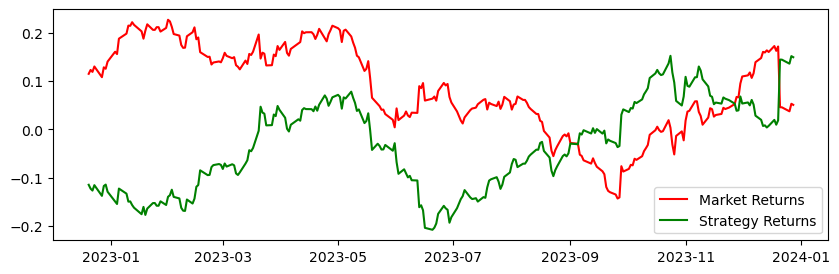

In [114]:
plt.figure(figsize=(10,3))
plt.plot(trade_nkedata['Cumulative Market Returns'], color='r', label='Market Returns')
plt.plot(trade_nkedata['Cumulative Strategy Returns'], color='g', label='Strategy Returns')
plt.legend()
plt.show()